## 1. Importación de librerías

En este primera celda importamos `numpy`, `pyplot`, y `mplot3D`. En esta celda también se definen algunos atajos de $\LaTeX$ que pueden ser de utilidad.
$$
\newcommand{\pap}[1]{\left(#1\right)}
\newcommand{\pas}[1]{\left[#1\right]}
\newcommand{\pac}[1]{\left\{#1\right\}}
\newcommand{\pav}[1]{\left\vert#1\right\vert}
\newcommand{\rv}{\vec{r}}
\newcommand{\rb}{\mathbf{r}}
\newcommand{\ome}{\omega}
\newcommand{\iun}{\hat{\boldsymbol{\imath}}}
\newcommand{\jun}{\hat{\boldsymbol{\jmath}}}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline


## 2. Figuras de Lissajous

Graficaremos algunas figuras de _Lissajous_ las cuales representan la superposición de dos movimientos armónicos simples (uno vertical y uno horizontal):
$$
\rv = \cos\pap{\ome_1 t}\iun+\sin\pap{\ome_2 t}\jun \;,
\tag{1}
$$
con la misma fase y la razón de sus frecuencias $\frac{\ome_1}{\ome_2}$ es un número racional.

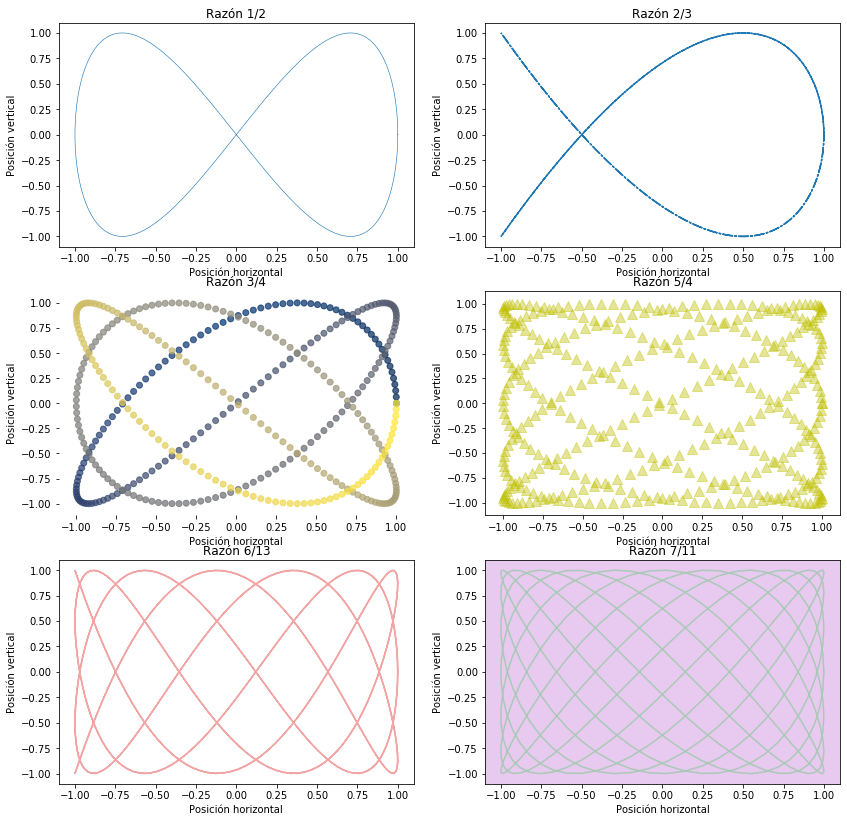

In [2]:
t = np.linspace(0,2*np.pi,400)
f=plt.figure(figsize=(14,14))
ax1 = f.add_subplot(321,title="Razón 1/2",frameon=True,xlabel="Posición horizontal",
                    ylabel="Posición vertical")
ax2 = f.add_subplot(322,title="Razón 2/3",frameon=True,xlabel="Posición horizontal",
                    ylabel="Posición vertical")
ax3 = f.add_subplot(323,title="Razón 3/4",frameon=False,xlabel="Posición horizontal",
                    ylabel="Posición vertical")
ax4 = f.add_subplot(324,title="Razón 5/4",frameon=True,xlabel="Posición horizontal",
                    ylabel="Posición vertical")
ax5 = f.add_subplot(325,title="Razón 6/13",alpha=0,frameon=True,xlabel="Posición horizontal",
                    ylabel="Posición vertical",fc=(0,0,0,0))
ax6 = f.add_subplot(326,title="Razón 7/11",frameon=True,xlabel="Posición horizontal",
                    ylabel="Posición vertical",fc=(0.7,0.3,0.8,0.3))
ax1.plot(np.cos(1*t),np.sin(2*t),linewidth=0.6)
ax2.plot(np.cos(2*t),np.sin(3*t),linestyle='-.',linewidth=1.5,
         dash_capstyle="round",dash_joinstyle="bevel")
ax3.scatter(np.cos(3*t),np.sin(4*t),c=t,alpha=0.7,cmap=plt.get_cmap("cividis"))
ax4.scatter(np.cos(5*t),np.sin(4*t),color="y",alpha=0.4,marker="^",s=100)
ax5.plot(np.cos(6*t),np.sin(13*t),color=(0.9,0.3,0.3,0.5))
ax6.plot(np.cos(7*t),np.sin(11*t),color=(0.1,0.8,0.2,0.3))


## 3. Gráficas de funciones de dos variables

En esta sección graficaremos la función:
$$
f(x,y)=\frac{\sin\pap{\sqrt{x^2+y^2}}}{\sqrt{x^2+y^2}}\;,
\tag{2}
$$
donde $\pap{x,y}\in\pas{-4\pi,4\pi}^2$.

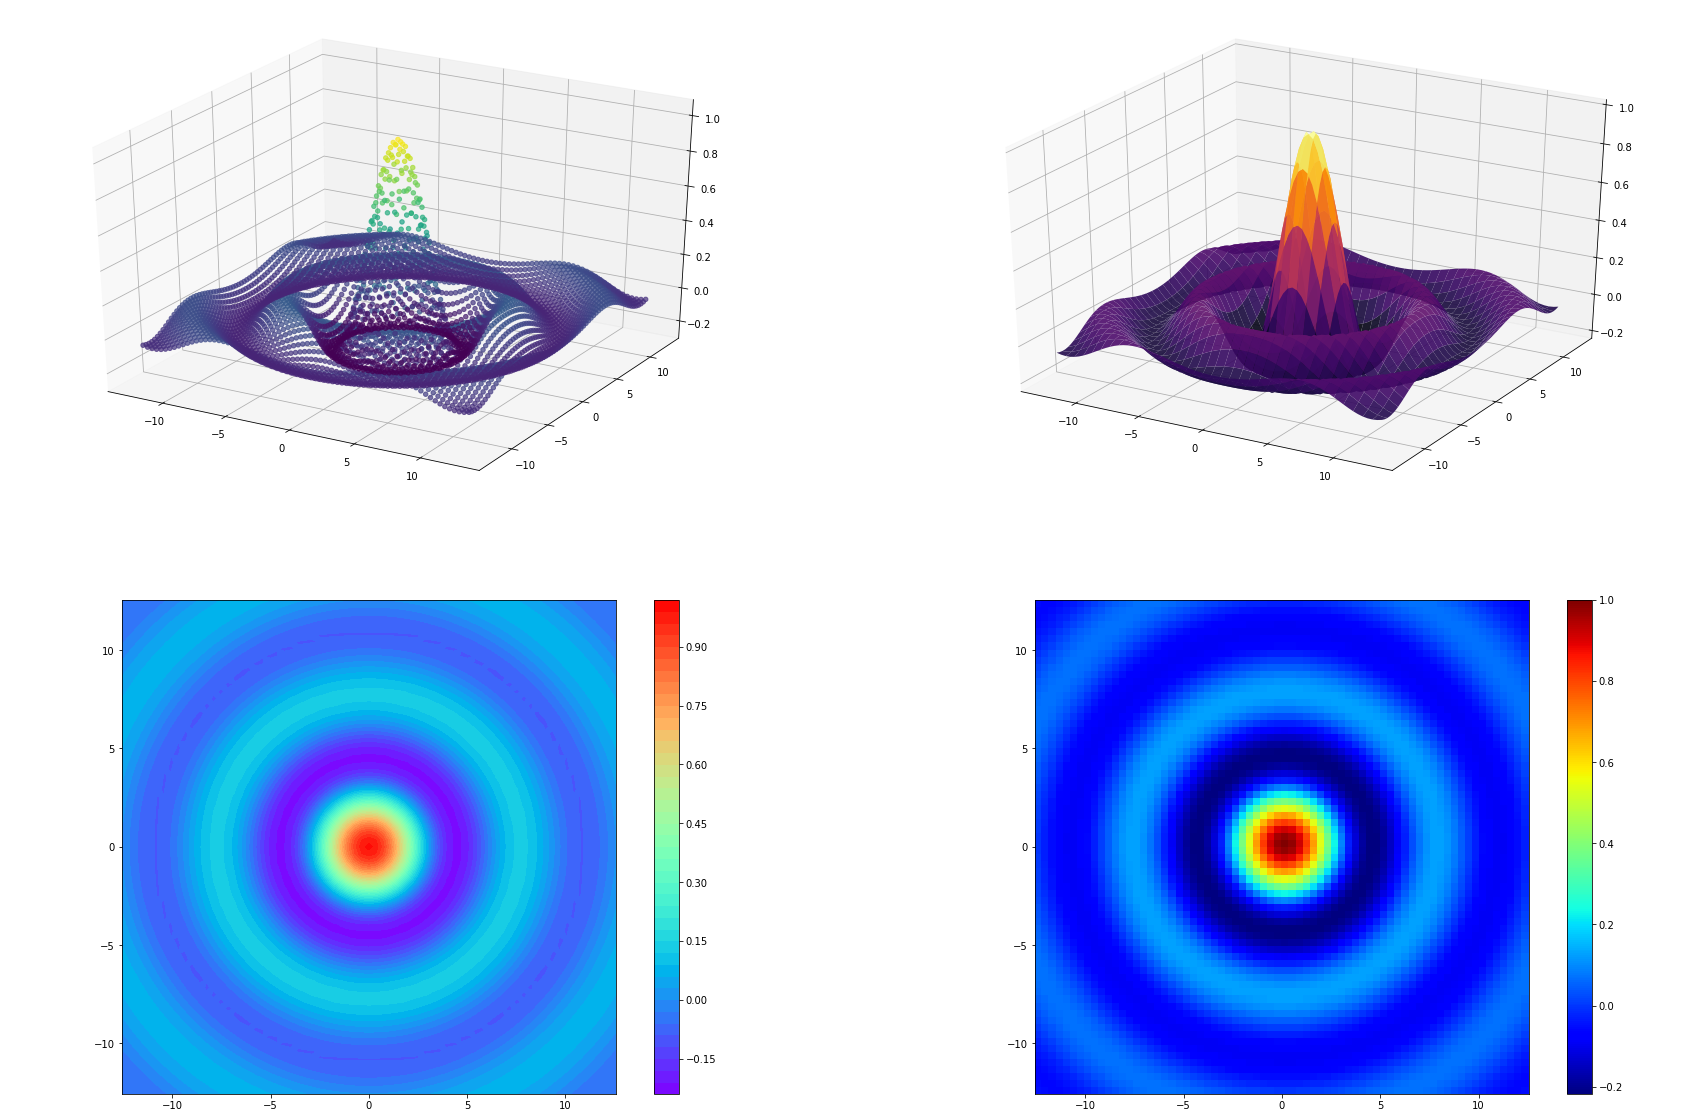

In [193]:
s = np.linspace(-4.0*np.pi, 4.0*np.pi, 71)
x,y = np.meshgrid(s,s)
f = lambda x,y: np.sin(np.sqrt(x**2+y**2+1e-16))/np.sqrt(x**2+y**2+1e-16)
z = f(x,y)
fig = plt.figure(figsize=(30,20))
ax1 = fig.add_subplot(221, projection="3d",fc=(0,0,0,0))
ax2 = fig.add_subplot(222, projection="3d",fc=(0,0,0,0))
ax3 = fig.add_subplot(223, fc=(0,0,0,0),aspect='equal')
ax4 = fig.add_subplot(224, fc=(0,0,0,0),aspect='equal')
ax1.scatter(x, y, z,c=z.flatten(),cmap="viridis",alpha=0.7)
ax2.plot_surface(x, y, z,cmap="inferno",alpha=0.9,edgecolor="none")
im3=ax3.contourf(x,y,z,levels=45,cmap="rainbow")
im4=ax4.pcolormesh(x,y,z,cmap="jet")
plt.colorbar(im3,ax=ax3)
plt.colorbar(im4,ax=ax4)

Estimemos dónde se encuentra el máximo de la función dentro del intervalo de gráfica, simplemente viendo dónde $z$ es máximo.

In [198]:
i,j=np.unravel_index(np.argmax(z),np.shape(z))
xmax,ymax,zmax=x[i,j],y[i,j],z[i,j]
print("El máximo se encuentra en el punto (x,y)=({0:.2f},{1:.2f}) y vale f(x,y)={2:0.2f}".format(xmax,ymax,zmax))

El máximo se encuentra en el punto (x,y)=(0.00,0.00) y vale f(x,y)=1.00


## 4. Manipulación de imágenes

En esta sección vemos como podemos manipular los datos de imágenes del tipo png, sabiendo que cada punto se denota en una escala `rgba` (rojo,verde,azul,transparencia). Primero importamos la imagen original.

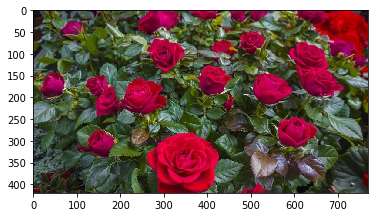

In [203]:
rosas=plt.imread("rosas.png")
wd,ht,r=np.shape(rosas)
rosasf=rosas
plt.imshow(rosas)

En esta imagen vemos las regiones de la imagen donde se concentran los rojos.

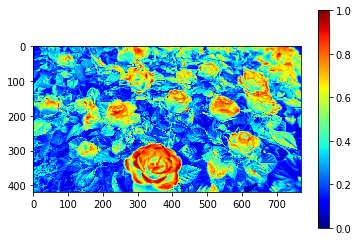

In [161]:
x=rosasf[:,:,0]
u=plt.imshow(x,cmap="jet")
plt.colorbar(u)
            

En esta imagen volvemos gris todo los que nos es bastante rojo.

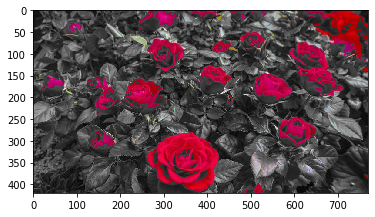

In [200]:
wd,ht,a=np.shape(rosas)
for i in range(wd):
    for j in range(ht):
        r,g,b,a=rosas[i,j]
        s=(r+g+b)/3
        if r<0.6:            
            rosas[i,j]=[s,s,s,a]
plt.imshow(rosas)

En cambio, en esta imagen mostramos la imagen en negativo.

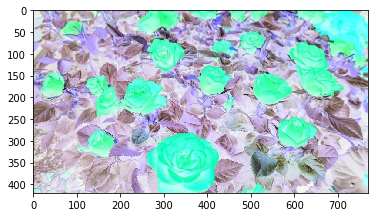

In [204]:
del(rosas)
rosas=plt.imread("rosas.png")
wd,ht,a=np.shape(rosas)
for i in range(wd):
    for j in range(ht):
        r,g,b,a=rosas[i,j]
        rosas[i,j]=[1-r,1-g,1-b,a]
plt.imshow(rosas)

Y en esta imagen cambiamos los rojos por los verdes.

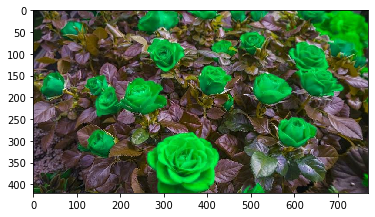

In [206]:
del(rosas)
rosas=plt.imread("rosas.png")
wd,ht,a=np.shape(rosas)
for i in range(wd):
    for j in range(ht):
        r,g,b,a=rosas[i,j]
        rosas[i,j]=[g,r,b,a]
plt.imshow(rosas)

## 5. Operaciones de álgebra lineal con vectores

En esta sección se explican algunas operaciones de álgebra lineal con vectores. Sean los vectores en $\mathbb{R}^3$ (espacio euclidiano): $\rb _1=\pap{4,5,6}$ y $\rb _2=\pap{6,3,1}$. Primero los definimos: 

In [207]:
r1,r2=np.array([4,5,6]),np.array([6,3,1])

Luego mostramos algunas de sus operaciones:

In [217]:
print("La suma vectorial r1+r2 es {}".format(r1+r2))
print("El producto punto euclidiano r1.r2 es {}".format(sum(r1*r2)))
print("El producto por un escalar 2*r1 es {}".format(2*r1))
print("La norma euclidiana de r1 es {}".format(np.linalg.norm(r1)))
print("El producto cruz r1 x r2 es {}".format(np.cross(r1,r2)))

La suma vectorial r1+r2 es [10  8  7]
El producto punto euclidiano r1.r2 es 45
El producto por un escalar 2*r1 es [ 8 10 12]
La norma euclidiana de r1 es 8.774964387392123
El producto cruz r1 x r2 es [-13  32 -18]
